In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

                A)DATA PREPROCESSING

In [ ]:
data=pd.read_csv("indian_liver_patient.csv")

In [ ]:
data.rename(columns={'Dataset':'Outcome'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


                1)DATA NORMALISATION

In [ ]:
x = data.iloc[:,1:]

#normalize values 
data.iloc[:,1:] = (x-x.min())/ (x.max() - x.min())

#view normalized DataFrame 
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,62,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,62,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,58,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,72,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0
5,46,1.0,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.400,0.0
6,26,0.0,0.006702,0.005102,0.044455,0.003015,0.000407,0.623188,0.565217,0.280,0.0
7,29,0.0,0.006702,0.010204,0.067904,0.002010,0.000203,0.579710,0.586957,0.320,0.0
8,17,1.0,0.006702,0.010204,0.067904,0.006030,0.001830,0.681159,0.695652,0.360,1.0
9,55,1.0,0.004021,0.005102,0.110894,0.021608,0.009758,0.594203,0.543478,0.280,0.0


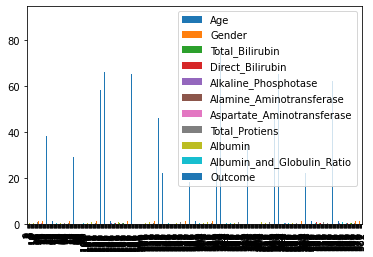

In [ ]:
data.plot(kind='bar') 

plt.show() 

            2)STANDARDISATION

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas
import numpy
arr=data.values #convert data frame to array
X=arr[:,0:10] #not normalizing id column and class column
Y=arr[:,10]
scaler=StandardScaler().fit(X) #fit data for standardization
rescaledX=scaler.transform(X) #convert the data as per (x-µ)/σ
numpy.set_printoptions(precision=3)
print("Standardized:\n")
print(rescaledX[0:2,:])
print(X[0:2,:])

Standardized:

[[ 1.252 -1.762 -0.419 -0.494 -0.427 -0.355 -0.318  0.292  0.199 -0.147]
 [ 1.067  0.567  1.225  1.43   1.683 -0.092 -0.034  0.938  0.073 -0.648]]
[[6.500e+01 0.000e+00 4.021e-03 0.000e+00 6.058e-02 3.015e-03 1.626e-03
  5.942e-01 5.217e-01 2.400e-01]
 [6.200e+01 1.000e+00 1.408e-01 2.755e-01 3.107e-01 2.714e-02 1.830e-02
  6.957e-01 5.000e-01 1.760e-01]]


            3)No missing places in dataset for values to be imputed

        B)DATA SUMMARISATION

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,62,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,62,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,58,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,72,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0


In [ ]:
data.isnull().sum() 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Outcome                       0
dtype: int64

In [ ]:
data.dtypes  #THE FEATURES ARE INTEGER AND FLOAT

Age                             int64
Gender                        float64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Outcome                       float64
dtype: object

In [ ]:
print(data.shape) 

(583, 11)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    float64
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 54.7 KB


In [ ]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,0.038858,0.070720,0.111176,0.035534,0.020311,0.548288,0.487359,0.258826,0.286449
std,16.189833,0.429603,0.083238,0.143291,0.118680,0.091769,0.058735,0.157312,0.172939,0.127837,0.452490
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.005362,0.005102,0.054958,0.006533,0.003049,0.449275,0.369565,0.160000,0.000000
50%,45.000000,1.000000,0.008043,0.010204,0.070835,0.012563,0.006505,0.565217,0.478261,0.252000,0.000000
75%,58.000000,1.000000,0.029491,0.061224,0.114802,0.025377,0.015654,0.652174,0.630435,0.320000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.Age.value_counts()[:30]

60    34
45    25
50    23
42    21
38    21
32    20
48    20
55    18
65    17
40    17
46    16
33    15
58    14
75    14
26    14
66    12
35    12
18    11
49    11
36    11
51    10
30    10
70     9
62     9
37     9
22     9
31     8
54     8
34     8
28     8
Name: Age, dtype: int64

In [ ]:
data.Outcome.value_counts()

0.0    416
1.0    167
Name: Outcome, dtype: int64

In [ ]:
data.Gender.value_counts()

1.0    441
0.0    142
Name: Gender, dtype: int64

In [ ]:
NoDisease = len(data[data.Outcome == 0])
HaveDisease = len(data[data.Outcome == 1])
print("Percentage of patients dont have liver disorder: {:.2f}%".format((NoDisease/(len(data.Outcome)))*100))
print("Percentage of patients have liver disorder: {:.2f}%".format((HaveDisease/(len(data.Outcome)))*100))

Percentage of patients dont have liver disorder: 71.36%
Percentage of patients have liver disorder: 28.64%


In [ ]:
countFemale= len(data[data.Gender == 0])
countMale = len(data[data.Gender == 1])
print("% of Female Patients: {:.2f}%".format((countFemale/(len(data.Gender))*100)))
print("% of male Patients: {:.2f}%".format((countMale/(len(data.Gender))*100)))


% of Female Patients: 24.36%
% of male Patients: 75.64%


In [ ]:
young_ages = data[(data.Age>=29)&(data.Age<40)]
middle_ages = data[(data.Age>=40)&(data.Age<55)]
elderly_ages = data[(data.Age>=55)]
print("young age:", len(young_ages))
print("middle age:", len(middle_ages))
print("elderly age:", len(elderly_ages))

young age: 127
middle age: 182
elderly age: 176


            C)DATA VISUALISATION

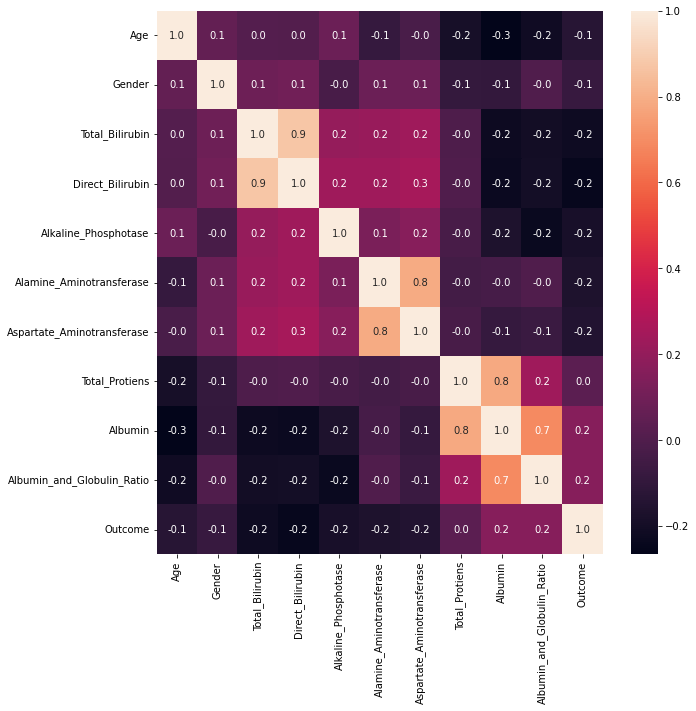

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

<function matplotlib.pyplot.show>

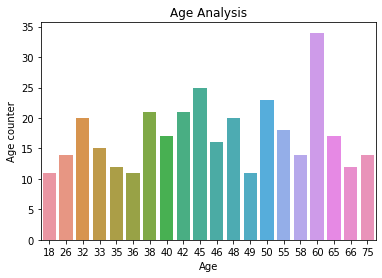

In [ ]:
sns.barplot(x= data.Age.value_counts()[:20].index, y= data.Age.value_counts()[:20].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


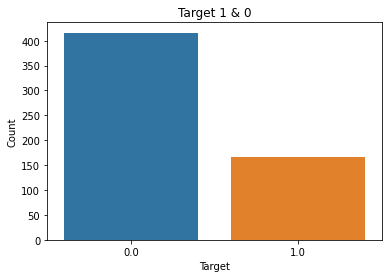

In [ ]:
sns.countplot(data.Outcome)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


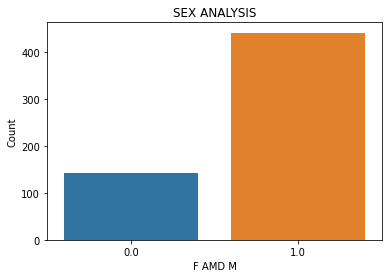

In [ ]:
sns.countplot(data.Gender)
plt.xlabel('F AMD M')
plt.ylabel('Count')
plt.title('SEX ANALYSIS')
plt.show()

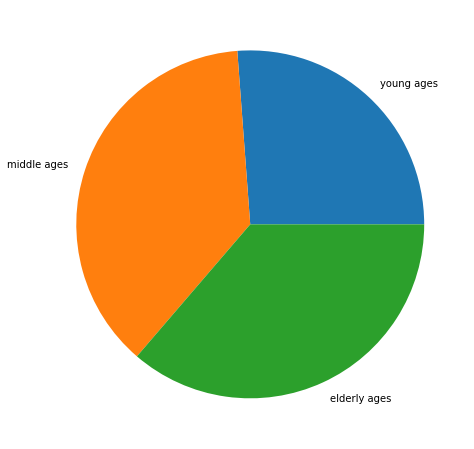

In [ ]:
colors = ['red','blue', 'green']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['young ages', 'middle ages', 'elderly ages'])
plt.show()

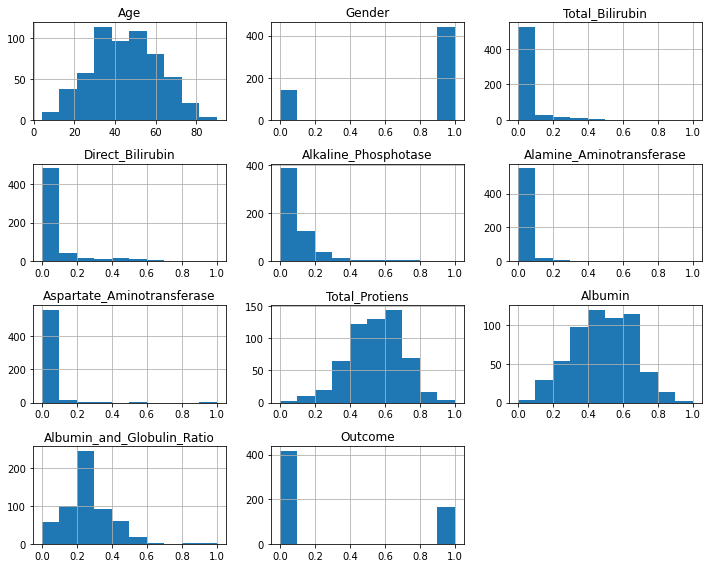

In [ ]:
data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

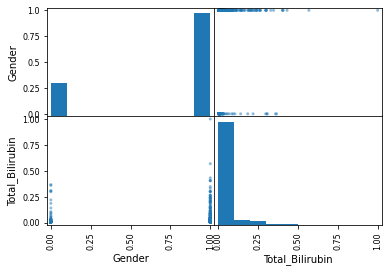

In [ ]:
import matplotlib.pyplot as plt 
import pandas 
from pandas.plotting import scatter_matrix 
scatter_matrix(data[['Gender','Total_Bilirubin']]) 
plt.show() 

In [ ]:
df = pd.DataFrame(data)
  
# saving the dataframe
df.to_csv(r'indian_liver_patient_new.csv', index=False)

            D)DATA INTERPRETATION

A)The indian_liver_patient_record dataset from kaggle is a clean dataset with no missing values as such.So there was no need of modification.

B)The dataset contains 582 samples which helps to predict whether a person is having liver disease or not.

C)The features used here are:Age,Gender= (1 = male; 2 = female),Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome(the outcome variable).


D)There are 9 features which helps us find the 10th outcome whether the patient is suffering from liver disorder or not.
All  the features are integers except one is float(As a whole numerical data).

E)The age group above 40 is mainly affected according to analysing the data.The people affected by liver disorder are less frequent 
than detected negative.The female are less affected than male.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("indian_liver_patient_new.csv")
df = pd.DataFrame(data)

In [ ]:
df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Outcome                       0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Age', 'Gender_Encoded','Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 
        'Albumin', 'Albumin_and_Globulin_Ratio'])

              E) Data Splitting 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
y = df.Outcome
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [ ]:
len(X_train), len(X_test)

(408, 175)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 69.14285714285714 % and k = [10, 12]


In [ ]:
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6914285714285714

Result visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


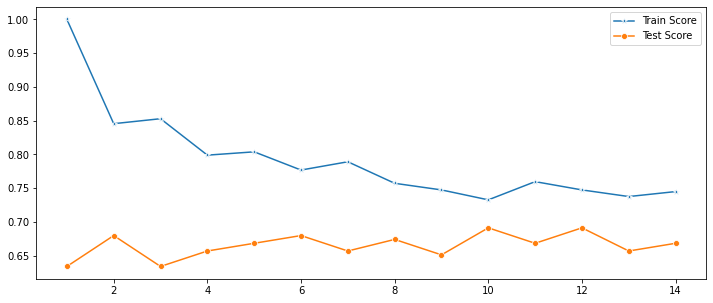

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

  Model Performance Analysis


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,115,10,125
1.0,44,6,50
All,159,16,175


Text(0.5, 15.0, 'Predicted label')

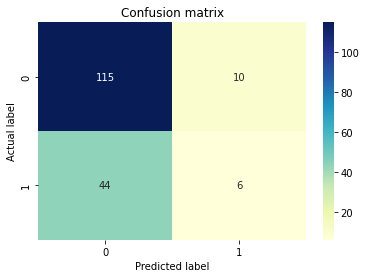

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81       125
         1.0       0.38      0.12      0.18        50

    accuracy                           0.69       175
   macro avg       0.55      0.52      0.50       175
weighted avg       0.62      0.69      0.63       175

Accuracy score -  0.6914285714285714


  K-Fold cross validation


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(knn, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.712 0.644 0.712 0.776 0.724 0.672 0.655 0.621 0.672 0.69 ]
cv_scores mean:0.6878141437755699


  Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

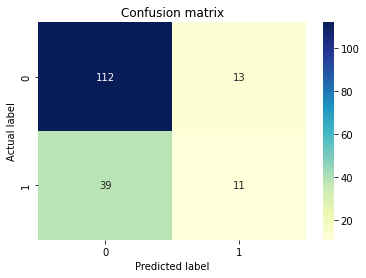

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81       125
         1.0       0.46      0.22      0.30        50

    accuracy                           0.70       175
   macro avg       0.60      0.56      0.55       175
weighted avg       0.66      0.70      0.66       175

Accuracy score -  0.7028571428571428


In [ ]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.558


  K-Fold Crossvalidation


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(lr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.712 0.695 0.729 0.741 0.724 0.741 0.707 0.707 0.707 0.759]
cv_scores mean:0.7221800116890708


  Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)

In [ ]:
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.64
Report card of this model - 
              precision    recall  f1-score   support

         0.0      0.738     0.768     0.753       125
         1.0      0.356     0.320     0.337        50

    accuracy                          0.640       175
   macro avg      0.547     0.544     0.545       175
weighted avg      0.629     0.640     0.634       175

Accuracy score -  0.64


Text(0.5, 15.0, 'Predicted label')

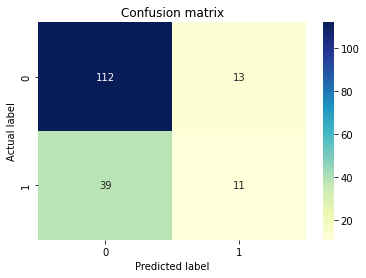

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

  K-Fold Validation


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(dtree, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.712 0.627 0.746 0.672 0.707 0.603 0.69  0.638 0.655 0.707]
cv_scores mean:0.6757159555815313


  Most accuracy is for Logistic Regression


  Logistic Regression Implementation


In [ ]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    def fit( self, X, Y ) :        
        self.m, self.n = X.shape        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [ ]:
model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
model.fit( X_train, y_train )
Y_pred = model.predict( X_test )
print(Y_pred) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [ ]:
y_test=list(y_test)

In [ ]:
correctly_classified = 0
count = 0    
for count in range( np.size( Y_pred ) ) :   
    if y_test[count] == Y_pred[count] :            
        correctly_classified = correctly_classified + 1
    count = count + 1
      
print( "Accuracy on test set by our model       :  ", ( 
  correctly_classified / count ) * 100 )

Accuracy on test set by our model       :   71.42857142857143


Testing accuracy of sklearn implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()    
model1.fit( X_train, y_train)
Y_pred1 = model1.predict( X_test )
correctly_classified1 = 0

In [ ]:
count = 0    
for count in range( np.size( Y_pred ) ) :  
      
    if y_test[count] == Y_pred1[count] :            
        correctly_classified1 = correctly_classified1 + 1
          
    count = count + 1
      
print( "Accuracy on test set by sklearn model   :  ", ( 
  correctly_classified1 / count ) * 100 )

Accuracy on test set by sklearn model   :   70.28571428571428
